# Homework - perform multiple linear regression on the
`FuelConsumption.csv data`
* use follwing features: `['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'`
* make a two 2D plot of ENGINESIZE vs CO2EMISSIONS and CYLINDERS vs CO2EMISSIONS
* make a 3D plot of ENGINESIZE and CYLINDERS vs CO2EMISSIONS
* apply feature scaling (be able to swith it off and on) (commented or not commented)
* split the data into X_train/y_train and X_test/y_test (80%-20%)
  using `from sklearn.model_selection import train_test_split`
* train the model using X_train data
* evaluate the fit (R-Squared)
* print the metrics MAE, MAPE
* predict CO2 emission of the 10 randomly chosen cars, compare with the true values
* compare results with the simple single feature regression
* write short comments on each step

# Load python libraries

In [1]:
# Libraries 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd 
from sklearn.model_selection import train_test_split

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data into Pandas</h2>

In [2]:
df = pd.read_csv("FuelConsumption.csv")  #reading data 
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's select some features that we want to use for regression.


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

cdf.head() #selecting some features  

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


Let's plot Emission values with respect to Engine size:


<h2 id="reading_data">Visualize the data in 2D</h2>

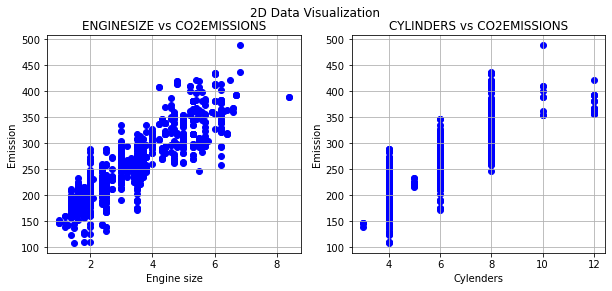

In [4]:
fig,ax=plt.subplots(1,2,figsize=(10,4)) #making subplots (1,2) 

fig.suptitle("2D Data Visualization ")  

ax[0].scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'],  color='blue') # subplot 1
ax[0].set_xlabel("Engine size")
ax[0].set_ylabel("Emission")
ax[0].set_title("ENGINESIZE vs CO2EMISSIONS")
ax[0].grid()

ax[1].scatter(cdf['CYLINDERS'], cdf['CO2EMISSIONS'],  color='blue') # subplot 2
ax[1].set_xlabel("Cylenders")
ax[1].set_ylabel("Emission")
ax[1].set_title("CYLINDERS vs CO2EMISSIONS")
ax[1].grid()


<h2 id="reading_data">Visualize the data in 3D</h2>

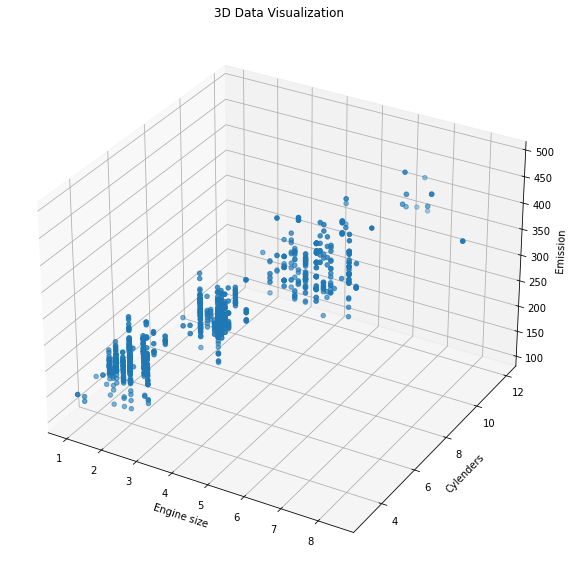

In [5]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d') # Making a 3d plot.
 
ax.scatter(cdf['ENGINESIZE'], cdf['CYLINDERS'], cdf['CO2EMISSIONS']) # the plot has a 3d projection (x,y,z)

ax.set_xlabel('Engine size')
ax.set_ylabel('Cylenders')
ax.set_zlabel('Emission') 
ax.set_title('3D Data Visualization')
plt.show()

# Normalize the data by feature-scaling
* try to make in a way that you can turn it on and off
* if you comment the feature scaling the program should still work

In [44]:
from sklearn import preprocessing # import library

X_data = cdf[['ENGINESIZE','CYLINDERS']].to_numpy() # features into numpy arrays 
y_data = cdf[['CO2EMISSIONS']].to_numpy()

x_scalar = preprocessing.StandardScaler() # Object from sklearn to scale 

X_data = x_scalar.fit(X_data).transform(X_data) #New data by featur-scaling 

print(X_data)

[[-0.9512918  -0.99896853]
 [-0.66865251 -0.99896853]
 [-1.30459092 -0.99896853]
 ...
 [-0.24469358  0.11424235]
 [-0.10337393  0.11424235]
 [-0.10337393  0.11424235]]


# Split the data into train and test using scikit-learn

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # Split the data 

<h2 id="multiple_regression_model">Train the model using X_train and y_train sets using scikit-learn</h2>


In [23]:
from sklearn import linear_model # Lineal Model 
regr = linear_model.LinearRegression() 

regr.fit(X_train, y_train) # Fit with train data

# The coefficients
print ('Coefficients: ', regr.coef_) # slope
print ('Intercept: ',regr.intercept_) # intercept

Coefficients:  [[38.31720427 17.65442926]]
Intercept:  [255.97055709]


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Evaluate R2</h2>

<h2 id="prediction">Prediction C02 emission from ten random cars</h2>

In [24]:
preds = regr.predict(X_test[0:10,:])

print("\nPrediction C02 emission from ten random cars \n")
for i in range(len(preds)):
    print("Prediction: ",preds[i], "True value: ", y_test[i])


Prediction C02 emission from ten random cars 

Prediction:  [201.88349556] True value:  [198]
Prediction:  [311.58435947] True value:  [283]
Prediction:  [390.80217317] True value:  [488]
Prediction:  [248.61146693] True value:  [278]
Prediction:  [201.88349556] True value:  [216]
Prediction:  [314.29184633] True value:  [354]
Prediction:  [196.46852184] True value:  [191]
Prediction:  [191.05354812] True value:  [196]
Prediction:  [201.88349556] True value:  [192]
Prediction:  [201.88349556] True value:  [193]


<h2 id="prediction">Print the metrics</h2>

* MAE    
* MAPE    
* R-squared    

In [25]:
preds = regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(preds- y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((preds - y_test) ** 2))
print("R2-score: %.2f" % regr.score(X_test, y_test))

Mean absolute error: 25.68
Residual sum of squares (MSE): 1126.85
R2-score: 0.76


# Visualize the fit in 3D

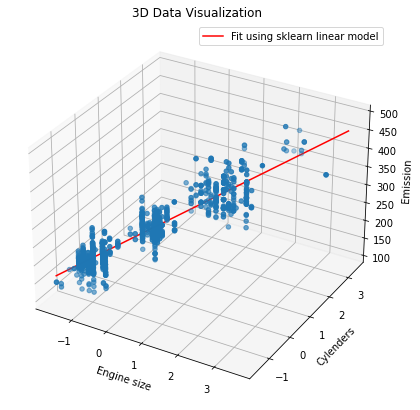

In [49]:
x = np.linspace(min(X_data[:,0]),max(X_data[:,0]),100)
y = np.linspace(min(X_data[:,1]),max(X_data[:,1]),100)

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection ='3d') # Making a 3d plot.

ax.scatter(X_data[:,0], X_data[:,1], y_data[:,0]) # the plot has a 3d projection (x,y,z)
ax.plot(x,y,regr.coef_[0][0]*x + regr.coef_[0][1]*y + regr.intercept_[0],color='red', label = 'Fit using sklearn linear model')

ax.set_xlabel('Engine size')
ax.set_ylabel('Cylenders')
ax.set_zlabel('Emission') 
ax.set_title('3D Data Visualization')
ax.legend(loc='best')
plt.show()

When we compare these multiple linear regression results with those of the simple single feature regression, we can realize that they are basically the same. It implies that adding a new feature(Cylenders) does not allow us to predict something new, i.e, no new or relevant informations is provided for this problem when you use multiple linear models.  